# **Hackathon**

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz 
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from tabulate import tabulate
from sklearn import preprocessing

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Test_data.csv to Test_data.csv
Saving Train_data.csv to Train_data.csv


# Imputation for missing values

In [350]:
import pandas as pd
train_knn=pd.read_csv("Train_data.csv",header=None)
test_knn=pd.read_csv("Test_data.csv",header=None)
train_knn.columns=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hrs_per_week","country","income"]
test_knn.columns=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hrs_per_week","country","income"]
train_knn["Type"]="Training"
test_knn["Type"]="Test"

In [351]:
# imputing for train for variable occupation
knn_impute=train_knn.loc[:,["age","education","sex","income","occupation"]]
ind=knn_impute[knn_impute.occupation== " ?" ].index
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
knn_impute["education"]= LabelEncoder().fit_transform(knn_impute["education"])
knn_impute["income"]= LabelEncoder().fit_transform(knn_impute["income"])
knn_impute["sex"]= LabelEncoder().fit_transform(knn_impute["sex"])
knn_impute["occupation1"]= LabelEncoder().fit_transform(knn_impute["occupation"]).astype(object)
coded_num=[ (knn_impute.groupby(by=["occupation","occupation1"])).agg("count").index[i][1] for i in range(len((knn_impute.groupby(by=["occupation","occupation1"])).agg("count")))]
coded_name=[ (knn_impute.groupby(by=["occupation","occupation1"])).agg("count").index[i][0] for i in range(len((knn_impute.groupby(by=["occupation","occupation1"])).agg("count")))]
Label_encoded=pd.DataFrame(data=[coded_name,coded_num]).T.rename(columns={0:"Coded_Name",1:"Coded_Num"})


knn_impute.pop("occupation")
nan=np.nan
knn_impute.occupation1=np.where(knn_impute.occupation1== 0 ,None ,knn_impute.occupation1)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")
k=imputer.fit_transform(knn_impute)
imputed=[k[l][4]for l in range(knn_impute.shape[0])]
knn_impute["occupation_imputed"]=np.round(imputed)
knn_impute_1=knn_impute["occupation_imputed"]

train=pd.concat([train_knn, knn_impute_1],axis=1,)
train=train.merge(Label_encoded,how="left",left_on="occupation_imputed",right_on="Coded_Num")
train=train.drop(columns=["occupation","occupation_imputed","Coded_Num","education_num"],axis=1).rename(columns={"Coded_Name": "occupation_imputed"})
train.occupation_imputed.value_counts()

 Prof-specialty       2987
 Craft-repair         2908
 Exec-managerial      2845
 Adm-clerical         2716
 Sales                2594
 Other-service        2499
 Machine-op-inspct    1621
 Transport-moving     1113
 Handlers-cleaners    1062
 Farming-fishing       838
 Tech-support          647
 Protective-serv       543
 Priv-house-serv       338
 Armed-Forces           34
Name: occupation_imputed, dtype: int64

In [352]:
# imputing for test for variable occupation
knn_impute=test_knn.loc[:,["age","education","sex","income","occupation"]]
ind=knn_impute[knn_impute.occupation== " ?" ].index
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
knn_impute["education"]= LabelEncoder().fit_transform(knn_impute["education"])
knn_impute["income"]= LabelEncoder().fit_transform(knn_impute["income"])
knn_impute["sex"]= LabelEncoder().fit_transform(knn_impute["sex"])
knn_impute["occupation1"]= LabelEncoder().fit_transform(knn_impute["occupation"]).astype(object)
coded_num=[ (knn_impute.groupby(by=["occupation","occupation1"])).agg("count").index[i][1] for i in range(len((knn_impute.groupby(by=["occupation","occupation1"])).agg("count")))]
coded_name=[ (knn_impute.groupby(by=["occupation","occupation1"])).agg("count").index[i][0] for i in range(len((knn_impute.groupby(by=["occupation","occupation1"])).agg("count")))]
Label_encoded=pd.DataFrame(data=[coded_name,coded_num]).T.rename(columns={0:"Coded_Name",1:"Coded_Num"})


knn_impute.pop("occupation")
nan=np.nan
knn_impute.occupation1=np.where(knn_impute.occupation1== 0 ,None ,knn_impute.occupation1)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")
k=imputer.fit_transform(knn_impute)
imputed=[k[l][4]for l in range(knn_impute.shape[0])]
knn_impute["occupation_imputed"]=np.round(imputed)
knn_impute_1=knn_impute["occupation_imputed"]

test=pd.concat([test_knn, knn_impute_1],axis=1,)
test=test.merge(Label_encoded,how="left",left_on="occupation_imputed",right_on="Coded_Num")
test=test.drop(columns=["occupation","occupation_imputed","Coded_Num","education_num"],axis=1).rename(columns={"Coded_Name": "occupation_imputed"})

In [353]:
# imputing for train for variable workclass
knn_impute=train.loc[:,["age","education","sex","income","occupation_imputed","workclass"]]
ind=knn_impute[knn_impute.workclass== " ?" ].index
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
knn_impute["education"]= LabelEncoder().fit_transform(knn_impute["education"])
knn_impute["income"]= LabelEncoder().fit_transform(knn_impute["income"])
knn_impute["sex"]= LabelEncoder().fit_transform(knn_impute["sex"])
knn_impute["occupation_imputed"]= LabelEncoder().fit_transform(knn_impute["occupation_imputed"]).astype(object)
knn_impute["workclass1"]= LabelEncoder().fit_transform(knn_impute["workclass"]).astype(object)
coded_num=[ (knn_impute.groupby(by=["workclass","workclass1"])).agg("count").index[i][1] for i in range(len((knn_impute.groupby(by=["workclass","workclass1"])).agg("count")))]
coded_name=[ (knn_impute.groupby(by=["workclass","workclass1"])).agg("count").index[i][0] for i in range(len((knn_impute.groupby(by=["workclass","workclass1"])).agg("count")))]
Label_encoded=pd.DataFrame(data=[coded_name,coded_num]).T.rename(columns={0:"Coded_Name",1:"Coded_Num"})


knn_impute.pop("workclass")
nan=np.nan
knn_impute.workclass1=np.where(knn_impute.workclass1== 0 ,None ,knn_impute.workclass1)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")
k=imputer.fit_transform(knn_impute)
imputed=[k[l][5]for l in range(knn_impute.shape[0])]
knn_impute["workclass_imputed"]=np.round(imputed)
knn_impute_1=knn_impute["workclass_imputed"]


train=pd.concat([train, knn_impute_1],axis=1,)
train=train.merge(Label_encoded,how="left",left_on="workclass_imputed",right_on="Coded_Num")
train=train.drop(columns=["workclass","workclass_imputed","Coded_Num"],axis=1).rename(columns={"Coded_Name": "workclass_imputed"})
train.workclass_imputed.value_counts()

 Private             16520
 Self-emp-not-inc     1855
 Local-gov            1496
 Self-emp-inc         1102
 State-gov             892
 Federal-gov           690
 Never-worked          182
 Without-pay             8
Name: workclass_imputed, dtype: int64

In [354]:
# imputing for test for variable workclass

knn_impute=test.loc[:,["age","education","sex","income","occupation_imputed","workclass"]]
ind=knn_impute[knn_impute.workclass== " ?" ].index
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
knn_impute["education"]= LabelEncoder().fit_transform(knn_impute["education"])
knn_impute["income"]= LabelEncoder().fit_transform(knn_impute["income"])
knn_impute["sex"]= LabelEncoder().fit_transform(knn_impute["sex"])
knn_impute["occupation_imputed"]= LabelEncoder().fit_transform(knn_impute["occupation_imputed"]).astype(object)
knn_impute["workclass1"]= LabelEncoder().fit_transform(knn_impute["workclass"]).astype(object)
coded_num=[ (knn_impute.groupby(by=["workclass","workclass1"])).agg("count").index[i][1] for i in range(len((knn_impute.groupby(by=["workclass","workclass1"])).agg("count")))]
coded_name=[ (knn_impute.groupby(by=["workclass","workclass1"])).agg("count").index[i][0] for i in range(len((knn_impute.groupby(by=["workclass","workclass1"])).agg("count")))]
Label_encoded=pd.DataFrame(data=[coded_name,coded_num]).T.rename(columns={0:"Coded_Name",1:"Coded_Num"})


knn_impute.pop("workclass")
nan=np.nan
knn_impute.workclass1=np.where(knn_impute.workclass1== 0 ,None ,knn_impute.workclass1)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")
k=imputer.fit_transform(knn_impute)
imputed=[k[l][5]for l in range(knn_impute.shape[0])]
knn_impute["workclass_imputed"]=np.round(imputed)
knn_impute_1=knn_impute["workclass_imputed"]


test=pd.concat([test, knn_impute_1],axis=1,)
test=test.merge(Label_encoded,how="left",left_on="workclass_imputed",right_on="Coded_Num")
test=test.drop(columns=["workclass","workclass_imputed","Coded_Num"],axis=1).rename(columns={"Coded_Name": "workclass_imputed"})
test.workclass_imputed.value_counts()

 Private             7225
 Self-emp-not-inc     758
 Local-gov            612
 Self-emp-inc         478
 State-gov            410
 Federal-gov          270
 Never-worked          57
 Without-pay            6
Name: workclass_imputed, dtype: int64

# **EDA**

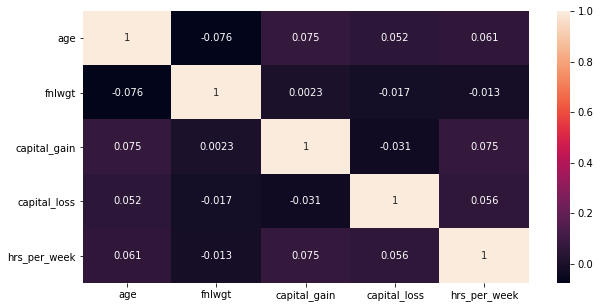

In [355]:
corr = train.corr()
plt.figure(figsize = (10,5),)
sns.heatmap(corr,annot=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f52511e1050>],
 'caps': [<matplotlib.lines.Line2D at 0x7f525b5b4c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f525b302a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f52514d9410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f52511e1750>,
  <matplotlib.lines.Line2D at 0x7f525b5b4290>]}

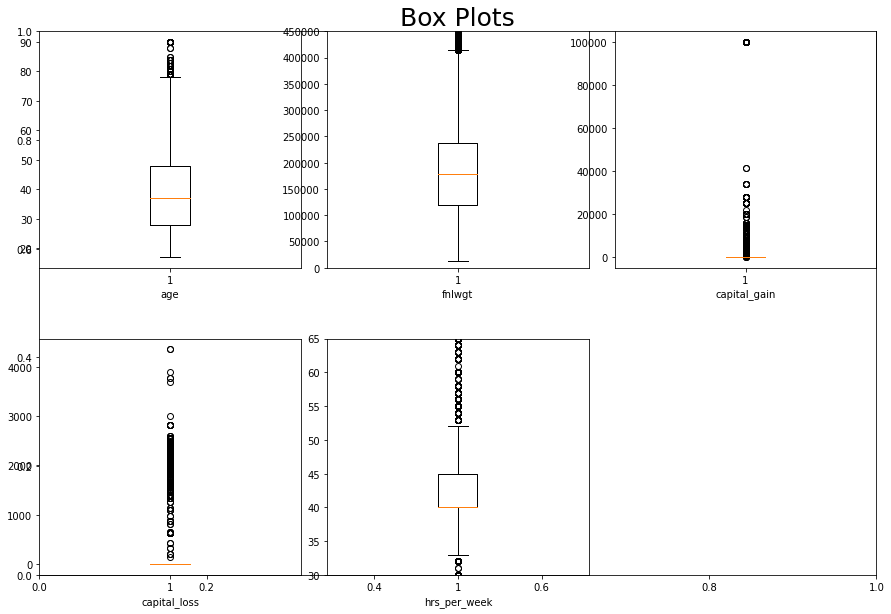

In [356]:
fig = plt.figure(figsize=(15,10))
plt.title("Box Plots", fontsize=25, color="black")
fig.subplots_adjust(hspace=0.2, wspace=0.1)
ax = fig.add_subplot(2, 3, 1)
#plt.ylim(0,12)
plt.xlabel('age')
plt.boxplot(train.age)
ax = fig.add_subplot(2, 3, 2)
plt.ylim(0.0,450000)
plt.xlabel('fnlwgt')
plt.boxplot(train.fnlwgt)
plt.subplots_adjust(hspace = 0.3)
ax = fig.add_subplot(2, 3, 3)
plt.xlabel('capital_gain')
plt.boxplot(train.capital_gain)
ax = fig.add_subplot(2, 3, 4)
plt.xlabel('capital_loss')
plt.boxplot(train.capital_loss)
ax = fig.add_subplot(2, 3, 5)
plt.ylim(30,65)
plt.xlabel('hrs_per_week')
plt.boxplot(train.hrs_per_week)

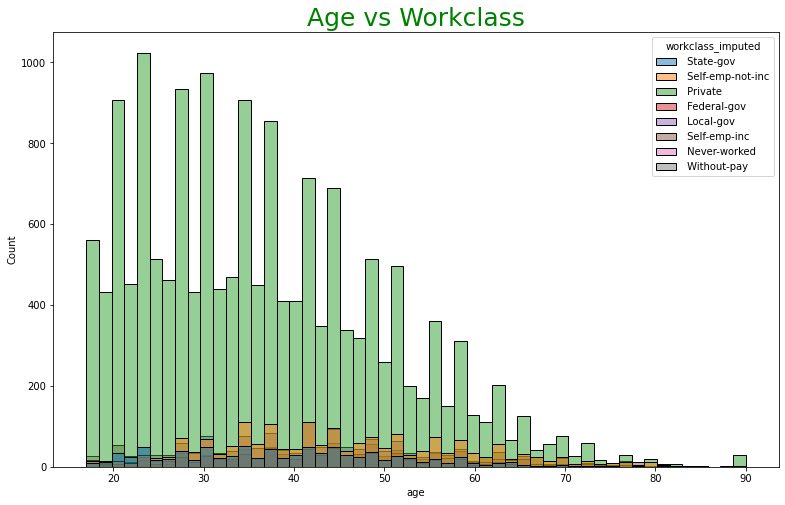

In [357]:
plt.figure(figsize = (13,8),)
plt.title("Age vs Workclass", fontsize=25, color="green")
sns.histplot(data=train, x ='age', hue='workclass_imputed' )

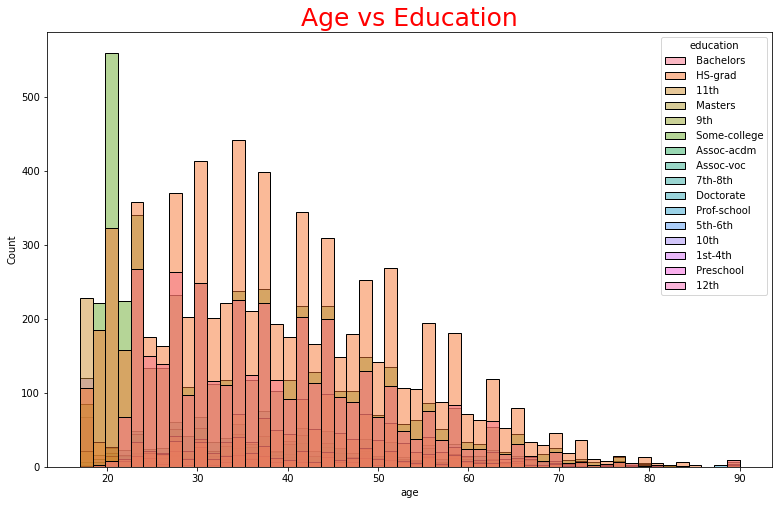

In [358]:
plt.figure(figsize = (13,8),)
plt.title("Age vs Education", fontsize=25, color="red")
sns.histplot(data=train, x ='age', hue='education')

<Figure size 2160x1080 with 0 Axes>

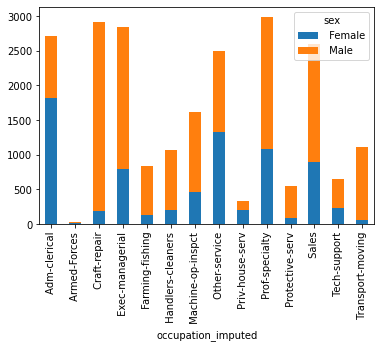

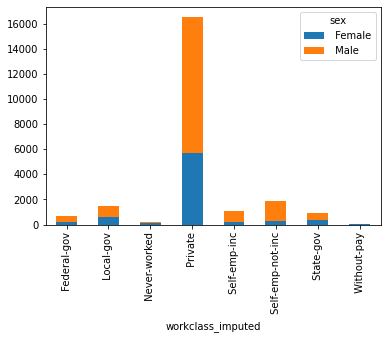

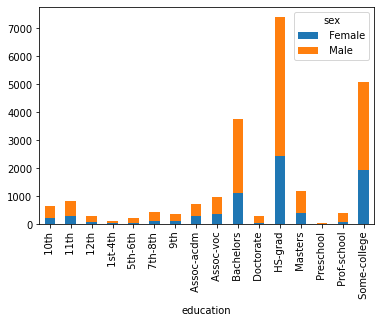

In [359]:
plt.figure(figsize = (30,15),)
fig.subplots_adjust(hspace=0.2, wspace=0.1)
df_plot = train.groupby(['sex', 'occupation_imputed']).size().reset_index().pivot(columns='sex', index='occupation_imputed', values=0)
ax = fig.add_subplot(1, 3, 1)
df_plot.plot(kind='bar',stacked=True)
df_plot = train.groupby(['sex', 'workclass_imputed']).size().reset_index().pivot(columns='sex', index='workclass_imputed', values=0)
ax = fig.add_subplot(1, 3, 2)
df_plot.plot(kind='bar',stacked=True)
df_plot = train.groupby(['sex', 'education']).size().reset_index().pivot(columns='sex', index='education', values=0)
ax = fig.add_subplot(1, 3, 3)
df_plot.plot(kind='bar',stacked=True)

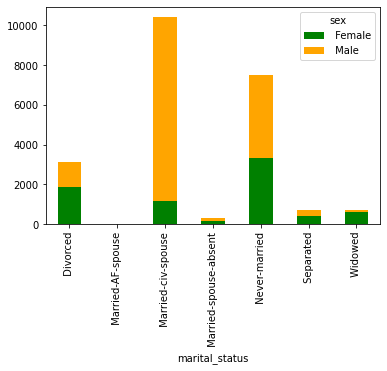

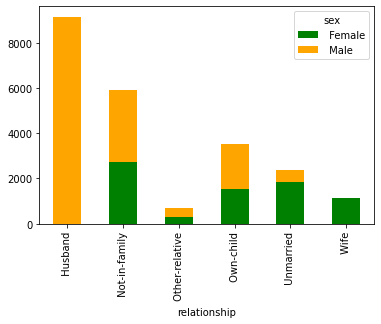

In [360]:
df_plot = train.groupby(['sex', 'marital_status']).size().reset_index().pivot(columns='sex', index='marital_status', values=0)
ax = fig.add_subplot(1, 2, 1)
df_plot.plot(kind='bar',stacked=True, color=['green', 'orange'])
df_plot = train.groupby(['sex', 'relationship']).size().reset_index().pivot(columns='sex', index='relationship', values=0)
ax = fig.add_subplot(1, 2, 2)
df_plot.plot(kind='bar',stacked=True, color=['green', 'orange'])

### **Almost 90% records have Native country "United States"**

In [361]:
options = ['United-States'] 
train_usa = train.loc[train['country'] == ' United-States'	]

In [362]:
train_usa

age  fnlwgt  ...  occupation_imputed  workclass_imputed
0       39   77516  ...        Adm-clerical          State-gov
1       50   83311  ...     Exec-managerial   Self-emp-not-inc
2       38  215646  ...   Handlers-cleaners            Private
3       53  234721  ...   Handlers-cleaners            Private
5       37  284582  ...     Exec-managerial            Private
...    ...     ...  ...                 ...                ...
22739   27  169460  ...     Exec-managerial            Private
22740   25  240081  ...               Sales            Private
22741   22  147655  ...        Adm-clerical            Private
22743   49   60751  ...     Protective-serv            Private
22744   44  194636  ...        Craft-repair   Self-emp-not-inc

[20377 rows x 15 columns]

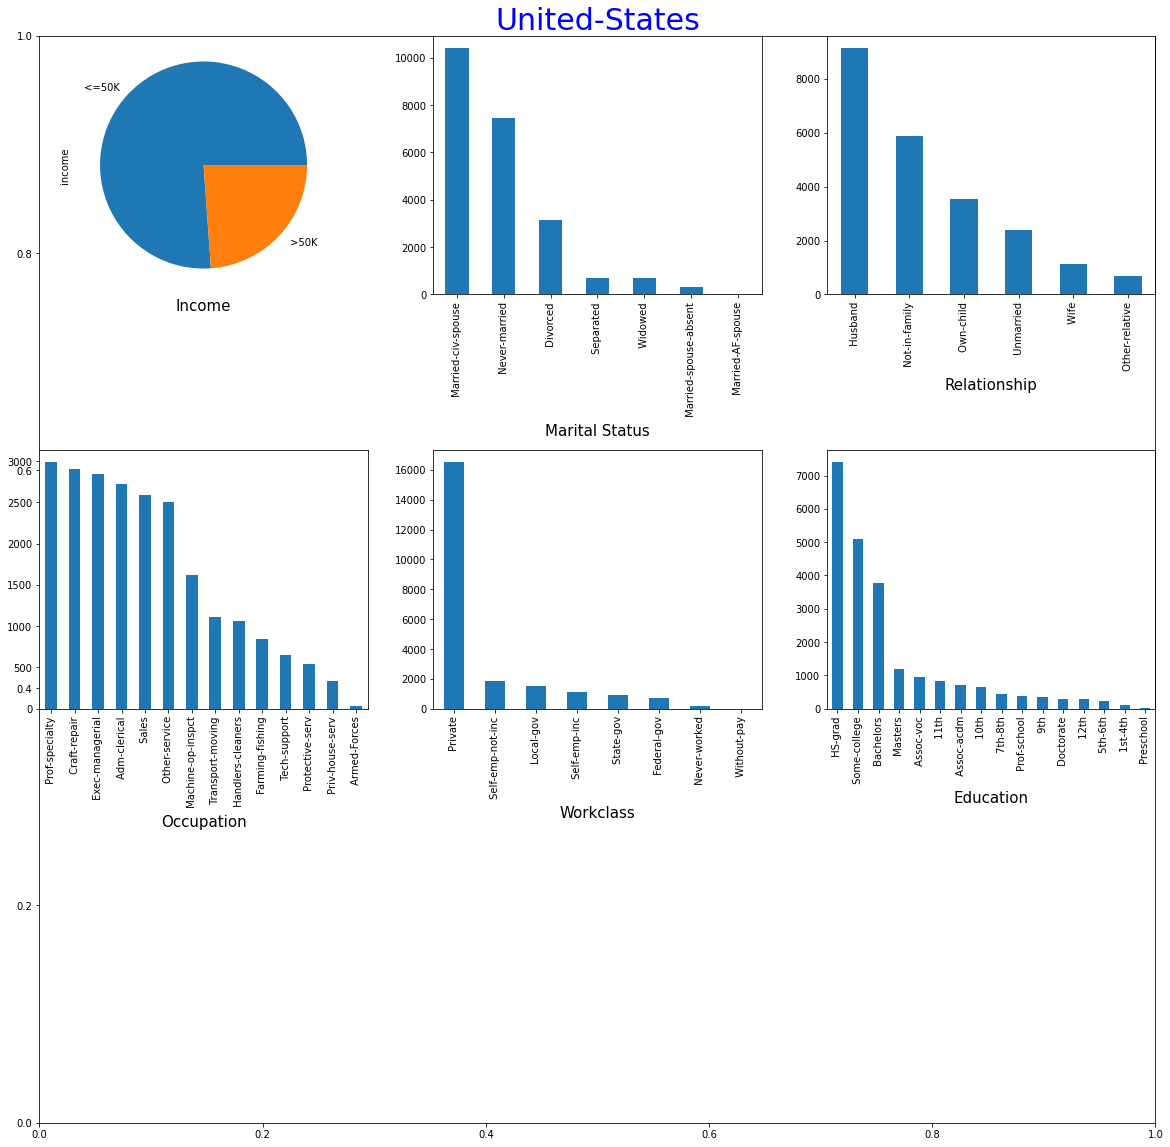

In [363]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.6, wspace=0.2)
plt.title("United-States", fontsize=30, color="blue")
ax = fig.add_subplot(3, 3, 1)
plt.xlabel('Income', fontsize=15)
train['income'].value_counts()[:].plot(kind='pie', )
ax = fig.add_subplot(3, 3, 2)
plt.xlabel('Marital Status', fontsize=15)
train['marital_status'].value_counts()[:].plot(kind='bar')
ax = fig.add_subplot(3, 3, 3)
plt.xlabel('Relationship', fontsize=15)
train['relationship'].value_counts()[:].plot(kind='bar')
ax = fig.add_subplot(3, 3, 4)
plt.xlabel('Occupation', fontsize=15)
train['occupation_imputed'].value_counts()[:].plot(kind='bar')
ax = fig.add_subplot(3, 3, 5)
plt.xlabel('Workclass', fontsize=15)
train['workclass_imputed'].value_counts()[:].plot(kind='bar')
ax = fig.add_subplot(3, 3, 6)
plt.xlabel('Education', fontsize=15)
train['education'].value_counts()[:].plot(kind='bar')


# **NAIVE BAYES**

#### **Pre Processing**

In [242]:
#import pandas as pd
#train=pd.read_csv("Train_data.csv",header=None)
#test=pd.read_csv("Test_data.csv",header=None)
#train.columns=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hrs_per_week","country","income"]
#test.columns=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hrs_per_week","country","income"]
#train.head(5)

In [243]:
df_train=train.copy()
df_test=test.copy()

In [244]:
#checking for missing values k.isnull().value_counts()
df_train.isna().value_counts()

age    fnlwgt  education  marital_status  relationship  race   sex    capital_gain  capital_loss  hrs_per_week  country  income  Type   occupation_imputed  workclass_imputed
False  False   False      False           False         False  False  False         False         False         False    False   False  False               False                22745
dtype: int64

No missing values , hence doesnt need missing value imputation

In [245]:
df_train.describe()

age        fnlwgt  capital_gain  capital_loss  hrs_per_week
count  22745.000000  2.274500e+04  22745.000000  22745.000000  22745.000000
mean      38.594768  1.896405e+05   1058.936601     86.717169     40.407606
std       13.659426  1.049884e+05   7320.783603    400.875277     12.284803
min       17.000000  1.228500e+04      0.000000      0.000000      1.000000
25%       28.000000  1.183760e+05      0.000000      0.000000     40.000000
50%       37.000000  1.783850e+05      0.000000      0.000000     40.000000
75%       48.000000  2.368050e+05      0.000000      0.000000     45.000000
max       90.000000  1.484705e+06  99999.000000   4356.000000     99.000000

In [246]:
#checking for correlation between variable
df_train.corr()

age    fnlwgt  capital_gain  capital_loss  hrs_per_week
age           1.000000 -0.075783      0.074821      0.051645      0.061058
fnlwgt       -0.075783  1.000000      0.002275     -0.017207     -0.013423
capital_gain  0.074821  0.002275      1.000000     -0.031292      0.074763
capital_loss  0.051645 -0.017207     -0.031292      1.000000      0.055742
hrs_per_week  0.061058 -0.013423      0.074763      0.055742      1.000000

In [247]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22745 entries, 0 to 22744
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 22745 non-null  int64 
 1   fnlwgt              22745 non-null  int64 
 2   education           22745 non-null  object
 3   marital_status      22745 non-null  object
 4   relationship        22745 non-null  object
 5   race                22745 non-null  object
 6   sex                 22745 non-null  object
 7   capital_gain        22745 non-null  int64 
 8   capital_loss        22745 non-null  int64 
 9   hrs_per_week        22745 non-null  int64 
 10  country             22745 non-null  object
 11  income              22745 non-null  object
 12  Type                22745 non-null  object
 13  occupation_imputed  22745 non-null  object
 14  workclass_imputed   22745 non-null  object
dtypes: int64(5), object(10)
memory usage: 2.8+ MB


#### **Binning Numerical Variables to Categorical**

In [248]:
#Binning for test data using same bins as train 
df_test.age= pd.cut(df_test.age,bins= np.linspace(min(df_train.age)-1,max(df_train.age)+1,6) ,labels=["Teens","Young_adults","Middle_aged" ,"Senior","Old_age"]).astype(object)
df_test.fnlwgt= pd.cut(df_test.fnlwgt,bins= np.linspace(min(df_train.fnlwgt)-1,max(df_train.fnlwgt)+1,4) ,labels=["small","average","large"]).astype(object)

df_test.capital_gain=np.where((pd.cut(df_test.capital_gain,bins= np.linspace(min(df_test.capital_gain),max(df_test.capital_gain)+1,5) ,labels=["small","medium","substancial","large"]).astype(object)).isna(),"Zero", pd.cut(df_test.capital_gain,bins= np.linspace(min(df_test.capital_gain),max(df_test.capital_gain)+1,5) ,labels=["small","medium","substancial","large"]).astype(object))
df_test.capital_loss=np.where((pd.cut(df_test.capital_loss,bins= np.linspace(min(df_test.capital_loss),max(df_test.capital_loss)+1,5) ,labels=["small","medium","substancial","large"]).astype(object)).isna(),"Zero", pd.cut(df_test.capital_loss,bins= np.linspace(min(df_test.capital_loss),max(df_test.capital_loss)+1,5) ,labels=["small","medium","substancial","large"]).astype(object))

#df_test.capital_gain= pd.cut(df_test.capital_gain,bins= np.linspace(min(df_train.capital_gain)-1,max(df_train.capital_gain)+1,4) ,labels=["small","medium","large"]).astype(object)
#df_test.capital_loss= pd.cut(df_test.capital_loss,bins= np.linspace(min(df_train.capital_loss)-1,max(df_train.capital_loss)+1,4) ,labels=["small","medium","large"]).astype(object)
df_test.hrs_per_week= pd.cut(df_test.hrs_per_week,bins= np.linspace(min(df_train.hrs_per_week)-1,max(df_train.hrs_per_week)+20,4) ,labels=["normal","overtime","slog"]).astype(object)


In [249]:
#Label encoders as, sckit_learn wont take str values to process
df_test.age=LabelEncoder().fit_transform(df_test['age'])
df_test.fnlwgt=LabelEncoder().fit_transform(df_test['fnlwgt'])
df_test.capital_gain=LabelEncoder().fit_transform(df_test['capital_gain'])
df_test.capital_loss= LabelEncoder().fit_transform(df_test['capital_loss'])
df_test.hrs_per_week=LabelEncoder().fit_transform(df_test['hrs_per_week'])

In [250]:
#Binning continuous variable 
import numpy as np
df_train.age= pd.cut(df_train.age,bins= np.linspace(min(df_train.age)-1,max(df_train.age)+1,5) ,labels=["Young_adults","Middle_aged" ,"Senior","Old_age"]).astype(object)
df_train.fnlwgt= pd.cut(df_train.fnlwgt,bins= np.linspace(min(df_train.fnlwgt)-1,max(df_train.fnlwgt)+1,4) ,labels=["small","average","large"]).astype(object)
#df_train.capital_gain= pd.cut(df_train.capital_gain,bins= np.linspace(min(df_train.capital_gain)-1,max(df_train.capital_gain)+1,4) ,labels=["small","medium","large"]).astype(object)
#df_train.capital_loss= pd.cut(df_train.capital_loss,bins= np.linspace(min(df_train.capital_loss)-1,max(df_train.capital_loss)+1,4) ,labels=["small","medium","large"]).astype(object)
df_train.capital_gain=np.where((pd.cut(df_train.capital_gain,bins= np.linspace(min(df_train.capital_gain),max(df_train.capital_gain)+1,5) ,labels=["small","medium","substancial","large"]).astype(object)).isna(),"Zero", pd.cut(df_train.capital_gain,bins= np.linspace(min(df_train.capital_gain),max(df_train.capital_gain)+1,5) ,labels=["small","medium","substancial","large"]).astype(object))
df_train.capital_loss=np.where((pd.cut(df_train.capital_loss,bins= np.linspace(min(df_train.capital_loss),max(df_train.capital_loss)+1,5) ,labels=["small","medium","substancial","large"]).astype(object)).isna(),"Zero", pd.cut(df_train.capital_loss,bins= np.linspace(min(df_train.capital_loss),max(df_train.capital_loss)+1,5) ,labels=["small","medium","substancial","large"]).astype(object))

df_train.hrs_per_week= pd.cut(df_train.hrs_per_week,bins= np.linspace(min(df_train.hrs_per_week)-1,max(df_train.hrs_per_week)+20,4) ,labels=["normal","overtime","slog"]).astype(object)


In [251]:
#Label encoding the trianing set , so that the algorithm can process it 
df_train['age']=LabelEncoder().fit_transform(df_train['age'])
df_train['fnlwgt']=LabelEncoder().fit_transform(df_train['fnlwgt'])
df_train['capital_gain']=LabelEncoder().fit_transform(df_train['capital_gain'])
df_train['capital_loss']=LabelEncoder().fit_transform(df_train['capital_loss'])
df_train['hrs_per_week']=LabelEncoder().fit_transform(df_train['hrs_per_week'])


In [252]:
#label encoding the already existing categorical variables
# Train data
df_train['workclass_imputed']=LabelEncoder().fit_transform(df_train['workclass_imputed'])
df_train['education']=LabelEncoder().fit_transform(df_train['education'])
df_train['marital_status']=LabelEncoder().fit_transform(df_train['marital_status'])
df_train['occupation_imputed']=LabelEncoder().fit_transform(df_train['occupation_imputed'])
df_train['relationship']=LabelEncoder().fit_transform(df_train['relationship'])
df_train['race']=LabelEncoder().fit_transform(df_train['race'])
df_train['sex']=LabelEncoder().fit_transform(df_train['sex'])
df_train['country']=LabelEncoder().fit_transform(df_train['country'])

# Test data
df_test['workclass_imputed']=LabelEncoder().fit_transform(df_test['workclass_imputed'])
df_test['education']=LabelEncoder().fit_transform(df_test['education'])
df_test['marital_status']=LabelEncoder().fit_transform(df_test['marital_status'])
df_test['occupation_imputed']=LabelEncoder().fit_transform(df_test['occupation_imputed'])
df_test['relationship']=LabelEncoder().fit_transform(df_test['relationship'])
df_test['race']=LabelEncoder().fit_transform(df_test['race'])
df_test['sex']=LabelEncoder().fit_transform(df_test['sex'])
df_test['country']=LabelEncoder().fit_transform(df_test['country'])

In [253]:
# checking for missing values 
df_train.isnull().value_counts()

age    fnlwgt  education  marital_status  relationship  race   sex    capital_gain  capital_loss  hrs_per_week  country  income  Type   occupation_imputed  workclass_imputed
False  False   False      False           False         False  False  False         False         False         False    False   False  False               False                22745
dtype: int64

In [254]:
# <=50 takes the value 0 , and >=50K takes the value 1 
from sklearn.preprocessing import LabelEncoder
df_train['income'] = LabelEncoder().fit_transform(df_train['income'])
df_test['income'] = LabelEncoder().fit_transform(df_test['income'])


In [255]:
df_train=df_train[['age', 'fnlwgt', 'education','occupation_imputed','workclass_imputed', 'marital_status', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hrs_per_week', 'country',
       'income']]
df_test=df_test[['age', 'fnlwgt', 'education','occupation_imputed','workclass_imputed', 'marital_status', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hrs_per_week', 'country',
       'income']  ]     

#### **Running Naive Bayes**

In [256]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
classifier=MultinomialNB()
classifier.fit(df_train.iloc[:,:13], df_train.iloc[:,13])
pred = (classifier.predict_proba(df_test.iloc[:,:13])[:,1]>=0.5).astype(int)
score = metrics.accuracy_score(df_test.iloc[:,13], pred)

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(df_test.iloc[:,13],pred)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])


Accuracy_NB={"Name": "Naive Bayes","Accuracy": metrics.accuracy_score(df_test.iloc[:,13], pred) , "Sensitivity":metrics.recall_score(df_test.iloc[:,13], pred) ,"Specificity": specificity1 ,"F1_score":metrics.f1_score(df_test.iloc[:,13], pred) ,"AUC_score":metrics.roc_auc_score(df_test.iloc[:,13], pred)}


In [257]:
Accuracy_NB

{'AUC_score': 0.6593686080671736,
 'Accuracy': 0.7830073349633252,
 'F1_score': 0.4852585790236829,
 'Name': 'Naive Bayes',
 'Sensitivity': 0.41625207296849087,
 'Specificity': 0.9024851431658563}

In [258]:
#changing the accuracy to 0.7 does not affect the accuracy 

pred = (classifier.predict_proba(df_test.iloc[:,:13])[:,1]>=0.7).astype(int)
score = metrics.accuracy_score(df_test.iloc[:,13], pred)
sensitivity=metrics.recall_score(df_test.iloc[:,13], pred)
Auc_score=metrics.roc_auc_score(df_test.iloc[:,13], pred)
metrics.f1_score(df_test.iloc[:,13], pred)
metrics.roc_curve(df_test.iloc[:,13], pred)
score

0.7832110839445803

#### **Plotting confusion metrics**

In [259]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.783
Confusion matrix, without normalization


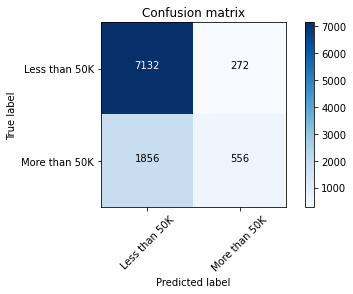

In [260]:
#Confusion matrix
import itertools
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(df_test.iloc[:,13], pred)
plot_confusion_matrix(cm, classes=['Less than 50K', 'More than 50K'])

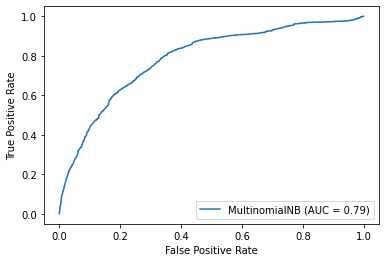

In [261]:
# ROC CURVE
plot_roc_curve(classifier,df_train.iloc[:,:13], df_train.iloc[:,13])
plt.show()


# **KNN**

In [262]:
train_knn=train.copy()
test_knn=test.copy()

#### **Creating a single dataset for data preprocessing**

In [263]:
#Concatenating TEST and TRAIN , to perform preprocssing 
train_knn["Type"]="Training"
test_knn["Type"]="Test"
full_data=pd.concat([train_knn,test_knn], axis=0)
full_data.head(2)


age  fnlwgt   education  ...      Type occupation_imputed  workclass_imputed
0   39   77516   Bachelors  ...  Training       Adm-clerical          State-gov
1   50   83311   Bachelors  ...  Training    Exec-managerial   Self-emp-not-inc

[2 rows x 15 columns]

In [264]:
full_data.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [265]:
full_data.tail(2)

age  fnlwgt education  ...  Type occupation_imputed workclass_imputed
9814   22  201490   HS-grad  ...  Test       Adm-clerical           Private
9815   52  287927   HS-grad  ...  Test    Exec-managerial      Self-emp-inc

[2 rows x 15 columns]

#### **Create dummmy variables for all majority class ==> Workclass**

In [266]:
#Create dummmy variables for all majority class
#hence exclude "without_pay " and "Never Worked"

pd.DataFrame(full_data.workclass_imputed.value_counts())

workclass_imputed
 Private                       23745
 Self-emp-not-inc               2613
 Local-gov                      2108
 Self-emp-inc                   1580
 State-gov                      1302
 Federal-gov                     960
 Never-worked                    239
 Without-pay                      14

In [267]:
#Selecting only majority class
df_workclass_imputed=pd.get_dummies(full_data.workclass_imputed, prefix="WORKCLASS").loc[:,[ 'WORKCLASS_ Federal-gov', 'WORKCLASS_ Local-gov', 'WORKCLASS_ Private','WORKCLASS_ Self-emp-inc', 'WORKCLASS_ Self-emp-not-inc','WORKCLASS_ State-gov']]

In [268]:
#concatentaing new columns
full_data=pd.concat([full_data,df_workclass_imputed],axis=1)
#deleting original column
full_data=full_data.drop(columns=["workclass_imputed"],axis=1)
full_data.head(2)

age  fnlwgt  ... WORKCLASS_ Self-emp-not-inc WORKCLASS_ State-gov
0   39   77516  ...                           0                    1
1   50   83311  ...                           1                    0

[2 rows x 20 columns]

#### **Create dummy variables for education (ORDINAL ENCODING ==> as the income depends on the level of education )**

In [269]:
#Create dummmy variables for all majority class
#hence exclude "without_pay " and "Never Worked"
(full_data.education.value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [270]:
#Selecting only majority class
import numpy as np
full_data.education =np.where((full_data.education ==" 11th") | (full_data.education ==" 10th")|(full_data.education ==" 7th-8th")|(full_data.education ==" 9th")|(full_data.education ==" 12th")|(full_data.education ==" 5th-6th")|(full_data.education ==" 1st-4th")|(full_data.education ==" Preschool")|(full_data.education ==" Prof-school")," School",full_data.education)

In [271]:
(full_data.education.unique())

array([' Bachelors', ' HS-grad', ' School', ' Masters', ' Some-college',
       ' Assoc-acdm', ' Assoc-voc', ' Doctorate'], dtype=object)

In [272]:
full_data.education=np.where(full_data.education == " Doctorate",5,full_data.education)
full_data.education=np.where(full_data.education == " Masters",4,full_data.education)
full_data.education=np.where(full_data.education == " Bachelors",3,full_data.education)
full_data.education=np.where(full_data.education == " Some-college",2,full_data.education)

full_data.education=np.where(full_data.education == " Assoc-voc",1,full_data.education)
full_data.education=np.where(full_data.education == " Assoc-acdm",1,full_data.education)
full_data.education=np.where(full_data.education == " School",1,full_data.education)
full_data.education=np.where(full_data.education == " HS-grad",1,full_data.education)

full_data.education.value_counts()

1    17779
2     7291
3     5355
4     1723
5      413
Name: education, dtype: int64

#### **Create dummy variables for education**

In [273]:
#Create dummmy variables for all majority class
#hence exclude "without_pay " and "Never Worked"
#(full_data.education.value_counts())

In [274]:
#Selecting only majority class
#import numpy as np
#full_data.education =np.where((full_data.education ==" 11th") | (full_data.education ==" 10th")|(full_data.education ==" 7th-8th")|(full_data.education ==" 9th")|(full_data.education ==" 12th")|(full_data.education ==" 5th-6th")|(full_data.education ==" 1st-4th")|(full_data.education ==" Preschool")|(full_data.education ==" Prof-school")," School",full_data.education)

In [275]:
#full_data.education.value_counts()

In [276]:
#df_education=pd.get_dummies(full_data.education,prefix="Education")

In [277]:
#concatentaing new columns
#full_data=pd.concat([full_data,df_education],axis=1)
#deleting original column
#full_data=full_data.drop(columns=["education"],axis=1)
#full_data.head(2)

#### **Creating Dummy variable for marital status**

In [278]:
#Create dummmy variables for all majority class
# Excluding Married-spouse-absent and Married-AF-spouse 
(full_data.marital_status.value_counts())

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [279]:
df_MS= pd.get_dummies(full_data.marital_status,prefix="Marital_Status").loc[:,['Marital_Status_ Divorced', 'Marital_Status_ Married-civ-spouse','Marital_Status_ Never-married', 'Marital_Status_ Separated','Marital_Status_ Widowed']]
df_MS.head(2)

Marital_Status_ Divorced  ...  Marital_Status_ Widowed
0                         0  ...                        0
1                         0  ...                        0

[2 rows x 5 columns]

In [280]:
#concatentaing new columns
full_data=pd.concat([full_data,df_MS],axis=1)
#deleting original column
full_data=full_data.drop(columns=["marital_status"],axis=1)
full_data.head(2)

age  fnlwgt  ... Marital_Status_ Separated Marital_Status_ Widowed
0   39   77516  ...                         0                       0
1   50   83311  ...                         0                       0

[2 rows x 24 columns]

In [281]:
full_data.occupation_imputed.value_counts()

 Prof-specialty       4261
 Craft-repair         4214
 Exec-managerial      4168
 Adm-clerical         3780
 Sales                3697
 Other-service        3567
 Machine-op-inspct    2287
 Transport-moving     1599
 Handlers-cleaners    1599
 Farming-fishing      1205
 Tech-support          935
 Protective-serv       764
 Priv-house-serv       443
 Armed-Forces           42
Name: occupation_imputed, dtype: int64

#### **Creating dummy variables for occupation**


In [282]:
full_data.occupation_imputed.value_counts()

 Prof-specialty       4261
 Craft-repair         4214
 Exec-managerial      4168
 Adm-clerical         3780
 Sales                3697
 Other-service        3567
 Machine-op-inspct    2287
 Transport-moving     1599
 Handlers-cleaners    1599
 Farming-fishing      1205
 Tech-support          935
 Protective-serv       764
 Priv-house-serv       443
 Armed-Forces           42
Name: occupation_imputed, dtype: int64

In [283]:
df_OC=np.where((full_data.occupation_imputed==" Protective-serv")|(full_data.occupation_imputed==" Priv-house-serv")|(full_data.occupation_imputed==" Armed-Forces")," Others" ,full_data.occupation_imputed)

In [284]:
full_data.occupation_imputed= df_OC
full_data.occupation_imputed.value_counts()

 Prof-specialty       4261
 Craft-repair         4214
 Exec-managerial      4168
 Adm-clerical         3780
 Sales                3697
 Other-service        3567
 Machine-op-inspct    2287
 Transport-moving     1599
 Handlers-cleaners    1599
 Others               1249
 Farming-fishing      1205
 Tech-support          935
Name: occupation_imputed, dtype: int64

In [285]:
df_OCP=pd.get_dummies(full_data.occupation_imputed,prefix="Occupation_imp").loc[:,['Occupation_imp_ Adm-clerical', 'Occupation_imp_ Craft-repair',
       'Occupation_imp_ Exec-managerial', 
       'Occupation_imp_ Handlers-cleaners',
       'Occupation_imp_ Machine-op-inspct', 'Occupation_imp_ Other-service',
        'Occupation_imp_ Prof-specialty',
       'Occupation_imp_ Sales',
       'Occupation_imp_ Transport-moving']]
#concatentaing new columns
full_data=pd.concat([full_data,df_OCP],axis=1)
#deleting original column
full_data=full_data.drop(columns=["occupation_imputed"],axis=1)
full_data.head(2)


age  fnlwgt  ... Occupation_imp_ Sales Occupation_imp_ Transport-moving
0   39   77516  ...                     0                                0
1   50   83311  ...                     0                                0

[2 rows x 32 columns]

#### **One hot encoding for RACE and SEX**


In [286]:
df_RACE=pd.get_dummies(full_data.race,prefix="race").loc[:,[ 'race_ Black', 'race_ White']]

full_data=pd.concat([full_data,df_RACE],axis=1)
#deleting original column
full_data=full_data.drop(columns=["race"],axis=1)
full_data.head(2)


age  fnlwgt  ... race_ Black race_ White
0   39   77516  ...           0           1
1   50   83311  ...           0           1

[2 rows x 33 columns]

In [287]:
# SEX and income 

full_data.sex=(np.where(full_data.sex==" Male",1,0))
full_data.income=np.where(full_data.income== " <=50K",0,1)
full_data.head(2)




age  fnlwgt  ... race_ Black race_ White
0   39   77516  ...           0           1
1   50   83311  ...           0           1

[2 rows x 33 columns]

#### **One hot encoding for relationship**

In [288]:
full_data.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [289]:
df_relatiobship= pd.get_dummies(full_data.relationship, prefix="relationship").loc[:,['relationship_ Husband', 'relationship_ Not-in-family','relationship_ Own-child','relationship_ Unmarried']]
full_data=pd.concat([full_data,df_relatiobship],axis=1)
#deleting original column
full_data=full_data.drop(columns=["relationship"],axis=1)
full_data.head(2)

age  fnlwgt  ... relationship_ Own-child  relationship_ Unmarried
0   39   77516  ...                       0                        0
1   50   83311  ...                       0                        0

[2 rows x 36 columns]

#### **One hot encoding for Country**

In [290]:
full_data.country=np.where((full_data.country== " United-States")| (full_data.country== ' Mexico'),1,0)
full_data.head(2)

age  fnlwgt  ... relationship_ Own-child  relationship_ Unmarried
0   39   77516  ...                       0                        0
1   50   83311  ...                       0                        0

[2 rows x 36 columns]

In [291]:
full_data.country.value_counts()

1    29813
0     2748
Name: country, dtype: int64

#### **Standarzing the Data**

In [292]:
df_stndardize= full_data.copy()
#feature=["age","fnlwgt","capital_gain","capital_loss","hrs_per_week","education"]
feature=["age","fnlwgt","capital_gain","capital_loss","hrs_per_week",]
df_stndard=df_stndardize[feature]

In [293]:
from sklearn.preprocessing import StandardScaler
df_stndard[feature] = StandardScaler().fit_transform(df_stndard)
final_standardized= df_stndard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [294]:
df_new=full_data.drop(columns=feature,axis=1)
full_data_scaled=pd.concat([df_stndard,df_new],axis=1)


In [295]:
income_1= full_data_scaled.pop("income")
full_data_scaled["income"]=income_1
full_data_scaled

age    fnlwgt  ...  relationship_ Unmarried  income
0     0.030671 -1.063611  ...                        0       0
1     0.837109 -1.008707  ...                        0       0
2    -0.042642  0.245079  ...                        0       0
3     1.057047  0.425801  ...                        0       0
4    -0.775768  1.408176  ...                        0       0
...        ...       ...  ...                      ...     ...
9811 -0.849080  0.639741  ...                        0       0
9812  0.103983 -0.335433  ...                        0       1
9813  1.423610 -0.358777  ...                        1       0
9814 -1.215643  0.110960  ...                        0       0
9815  0.983734  0.929893  ...                        0       1

[32561 rows x 36 columns]

In [296]:
scaled_test=full_data_scaled[full_data.Type == "Test"]
scaled_train=full_data_scaled[full_data.Type == "Training"]
scaled_test.pop("Type")
scaled_train.pop("Type")

0        Training
1        Training
2        Training
3        Training
4        Training
           ...   
22740    Training
22741    Training
22742    Training
22743    Training
22744    Training
Name: Type, Length: 22745, dtype: object

#### **Running the model**

       k  Validation Error       AUC
1    1.0          0.202832  0.720609
2    2.0          0.187958  0.670788
3    3.0          0.178178  0.740305
4    4.0          0.173289  0.705391
5    5.0          0.169010  0.744566
6    6.0          0.166769  0.721733
7    7.0          0.165342  0.749373
8    8.0          0.164324  0.727826
9    9.0          0.163814  0.748709
10  10.0          0.163610  0.731793
11  11.0          0.160758  0.751434
12  12.0          0.162286  0.734348
13  13.0          0.160656  0.749265
14  14.0          0.159026  0.740143
15  15.0          0.159535  0.752244
16  16.0          0.158822  0.742794
17  17.0          0.158822  0.752577
18  18.0          0.157498  0.744650
19  19.0          0.158619  0.752852


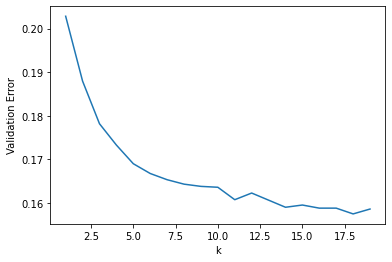

In [297]:
from sklearn import neighbors
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt

validation_error = 0
auc = 0
k = 0
df_results = pd.DataFrame(columns = ['k', 'Validation Error', 'AUC'])
for i in range(1, 20):
  kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
  kNN_classifier.fit(scaled_train.iloc[:,:34], scaled_train.iloc[:,34])
  pred = kNN_classifier.predict(scaled_test.iloc[:,:34])
  k = i
  validation_error = 1-accuracy_score(scaled_test.iloc[:,34], pred)
  auc = roc_auc_score(scaled_test.iloc[:,34], pred)
  df_results.loc[i] = [k, validation_error, auc]

print(df_results)
sns.lineplot(x = 'k', y = 'Validation Error', data = df_results )

In [298]:
  # Choosing k=15 for lowest validation Error
  
  kNN_classifier = neighbors.KNeighborsClassifier(n_neighbors = 15, metric = 'euclidean')
  kNN_classifier.fit(scaled_train.iloc[:,:34], scaled_train.iloc[:,34])
  pred = kNN_classifier.predict(scaled_test.iloc[:,:34])
  accuracy_score(scaled_test.iloc[:,34], pred)
  
  

0.8404645476772616

In [299]:
from sklearn import metrics
sensitivity=metrics.recall_score(df_test.iloc[:,13], pred)
Auc_score=metrics.roc_auc_score(df_test.iloc[:,13], pred)
metrics.f1_score(df_test.iloc[:,13], pred)
metrics.roc_curve(df_test.iloc[:,13], pred)
score

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(df_test.iloc[:,13],pred)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

Specificity :  0.9257158292814694


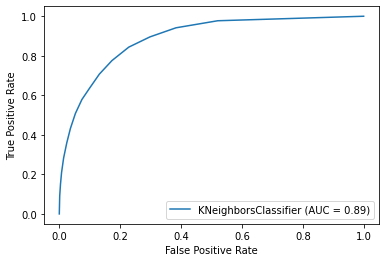

In [300]:
plot_roc_curve(kNN_classifier,scaled_test.iloc[:,:34], scaled_test.iloc[:,34])
plt.show()


#### ***Pipelinning with unscaled data***

In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [302]:
full_data_scaled= full_data.copy() 
income_1= full_data_scaled.pop("income")
full_data_scaled["income"]=income_1
full_data_scaled
scaled_test=full_data_scaled[full_data.Type == "Test"]
scaled_train=full_data_scaled[full_data.Type == "Training"]
scaled_test.pop("Type")
scaled_train.pop("Type")

0        Training
1        Training
2        Training
3        Training
4        Training
           ...   
22740    Training
22741    Training
22742    Training
22743    Training
22744    Training
Name: Type, Length: 22745, dtype: object

In [303]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix



pipe_kNN = Pipeline (steps = [ ('model',neighbors.KNeighborsClassifier(n_neighbors=12))])
pipe_kNN_scaled = Pipeline (steps = [('Scaler', StandardScaler()), ('model',neighbors.KNeighborsClassifier(n_neighbors=12))])
pipe_kNN_scaled_pca = Pipeline (steps = [('Scaler', StandardScaler()), ('pca',PCA(n_components=17)), ('model',neighbors.KNeighborsClassifier(n_neighbors=12))])

pipe_list = [pipe_kNN, pipe_kNN_scaled,pipe_kNN_scaled_pca]

for pipe in pipe_list:
  model = pipe.fit(scaled_train.iloc[:,:34], scaled_train.iloc[:,34]) 
  pred = model.predict(scaled_test.iloc[:,:34])
  cm1 = confusion_matrix(scaled_test.iloc[:,34], pred)
  specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print(' Accuracy', accuracy_score(scaled_test.iloc[:,34], pred),"\n" , "sensitivity", metrics.recall_score(scaled_test.iloc[:,34], pred) , "\n","Auc_score", metrics.roc_auc_score(scaled_test.iloc[:,34], pred), "\n","F1_score", metrics.f1_score(scaled_test.iloc[:,34], pred), "\n", 'Specificity', specificity1)




 Accuracy 0.7951303993480032 
 sensitivity 0.21475953565505804 
 Auc_score 0.5994786333056489 
 F1_score 0.34000656383327865 
 Specificity 0.9841977309562399
 Accuracy 0.8323145884270579 
 sensitivity 0.5033167495854063 
 Auc_score 0.7214044579909744 
 F1_score 0.595974472263132 
 Specificity 0.9394921663965424
 Accuracy 0.833842705786471 
 sensitivity 0.5091210613598673 
 Auc_score 0.7243741449424944 
 F1_score 0.6009297773427943 
 Specificity 0.9396272285251216


In [343]:
Accuracy_KNN={"Name":"Unscaled_KNN" ,"Accuracy":0.79513,"Sensitivity":"0.21475 ","Specificity":"0.94057","F1_score":"0.34000 ","AUC_score":"0.59947 "}
Accuracy_KNN_scaled={"Name":"Scaled_KNN" ,"Accuracy":0.83231,"Sensitivity":"0.5033 ","Specificity":"0.984197","F1_score":"0.5959 ","AUC_score":"0.721404"}
Accuracy_KNN_PCA={"Name":"Scaled_PCA_KNN" ,"Accuracy":0.8346 ,"Sensitivity":"0.50870","Specificity":"0.939492","F1_score":"0.6011758 ","AUC_score": "0.724436"}

# **DECISION TREES**

In [305]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn import tree
import graphviz 
import seaborn as sns


#### **Decision Trees (On Unscaled Data)**

In [306]:
full_data_scaled= full_data.copy() 
income_1= full_data_scaled.pop("income")
full_data_scaled["income"]=income_1
full_data_scaled
scaled_test=full_data_scaled[full_data.Type == "Test"]
scaled_train=full_data_scaled[full_data.Type == "Training"]
scaled_test.pop("Type")
scaled_train.pop("Type")

0        Training
1        Training
2        Training
3        Training
4        Training
           ...   
22740    Training
22741    Training
22742    Training
22743    Training
22744    Training
Name: Type, Length: 22745, dtype: object

In [307]:
model = DecisionTreeClassifier()
model.fit(scaled_train.iloc[:,:34], scaled_train.iloc[:,34])
pred = model.predict (scaled_test.iloc[:,:34])
print('Accuracy: ', accuracy_score(scaled_test.iloc[:,34], pred))
cm1 = confusion_matrix(scaled_test.iloc[:,34], pred)

Accuracy_dt={"Name" : "Decision Trees", "Accuracy":accuracy_score(scaled_test.iloc[:,34], pred),"Sensitivity":metrics.recall_score(scaled_test.iloc[:,34], pred),"Specificity": cm1[0,0]/(cm1[0,0]+cm1[0,1]),"F1_score":metrics.f1_score(scaled_test.iloc[:,34], pred),"AUC_score":metrics.roc_auc_score(scaled_test.iloc[:,34], pred)}


dot_data = tree.export_graphviz(model, out_file=None, feature_names=scaled_train.iloc[:,:34].columns, class_names=["0","1"],filled=True) 
graph = graphviz.Source(dot_data) 
graph

Accuracy:  0.8082722086389568


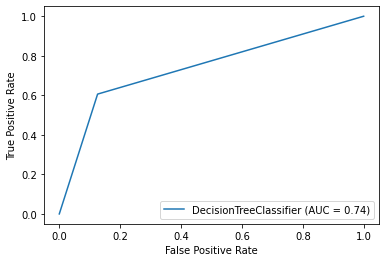

In [308]:
plot_roc_curve(model,scaled_test.iloc[:,:34], scaled_test.iloc[:,34])
plt.show()


#### **Hyperparameter tuning (Depth and Purity method)**

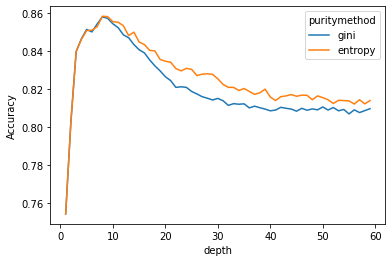

In [309]:
#determining for best purity method with depth 
ind = 1
crit = ['gini', 'entropy']
df_results = pd.DataFrame(columns = ['depth', 'puritymethod', 'Accuracy'])

for i in np.arange(1, 60):
  for j in crit:
    model = DecisionTreeClassifier(max_depth=i, criterion=j)
    model.fit(scaled_train.iloc[:,:34], scaled_train.iloc[:,34])
    pred = model.predict (scaled_test.iloc[:,:34])
    df_results.loc[ind] = [i, j, accuracy_score(scaled_test.iloc[:,34], pred)]
    ind+=1
sns.lineplot(x = 'depth', y = 'Accuracy', hue='puritymethod', data = df_results)

In [310]:
# Best accuracy at depth of 8 
model = DecisionTreeClassifier(max_depth=8, criterion="gini")
model.fit(scaled_train.iloc[:,:34], scaled_train.iloc[:,34])
pred = model.predict (scaled_test.iloc[:,:34])
print('Accuracy: ', accuracy_score(scaled_test.iloc[:,34], pred))

Accuracy_dt_HP={"Name" : "Decision Trees (Hyperparameter tuning)", "Accuracy":accuracy_score(scaled_test.iloc[:,34], pred),"Sensitivity":metrics.recall_score(scaled_test.iloc[:,34], pred),"Specificity": cm1[0,0]/(cm1[0,0]+cm1[0,1]),"F1_score":metrics.f1_score(scaled_test.iloc[:,34], pred),"AUC_score":metrics.roc_auc_score(scaled_test.iloc[:,34], pred)}


Accuracy:  0.8577832110839446


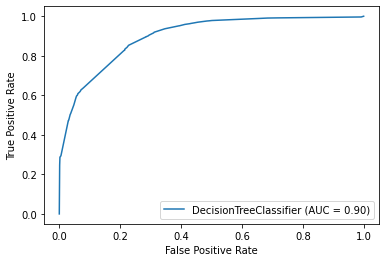

In [311]:
plot_roc_curve(model,scaled_test.iloc[:,:34], scaled_test.iloc[:,34])
plt.show()


#### **Further pruning the model**

In [312]:
#Further pruning the model

path = model.cost_complexity_pruning_path(scaled_train.iloc[:,:34], scaled_train.iloc[:,34])
ccp_alphas , impurities = path.ccp_alphas, path.impurities

In [313]:
#the different alpha values 
ccp_alphas

array([0.00000000e+00, 4.92002875e-06, 1.53453835e-05, 1.75444594e-05,
       3.76848915e-05, 3.90806282e-05, 3.97686675e-05, 4.12436292e-05,
       4.28801301e-05, 4.32329450e-05, 4.35282370e-05, 4.36937672e-05,
       4.37447735e-05, 4.39046433e-05, 4.60881891e-05, 5.39579128e-05,
       6.15011672e-05, 6.40262500e-05, 6.78328047e-05, 7.03451308e-05,
       7.45444195e-05, 7.79901125e-05, 8.47635476e-05, 8.62770322e-05,
       8.70882965e-05, 8.72719895e-05, 9.32111362e-05, 1.04187014e-04,
       1.04540256e-04, 1.10152136e-04, 1.11724620e-04, 1.12117280e-04,
       1.17241885e-04, 1.17984990e-04, 1.27537609e-04, 1.35860560e-04,
       1.38552112e-04, 1.52895763e-04, 1.56447820e-04, 1.59975209e-04,
       1.66918986e-04, 1.69292868e-04, 1.71908594e-04, 1.72789363e-04,
       1.74550858e-04, 1.81512588e-04, 1.91376190e-04, 2.02664706e-04,
       2.07437595e-04, 2.12261838e-04, 2.14163020e-04, 2.16246851e-04,
       2.16310315e-04, 2.18321332e-04, 2.21087409e-04, 2.57115878e-04,
      

In [314]:
#pruning by eliminating leaf nodes 
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(scaled_train.iloc[:,:34], scaled_train.iloc[:,34])
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.07122638200968923


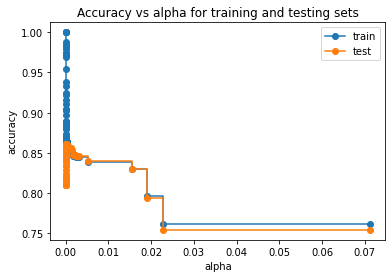

<Figure size 1152x1152 with 0 Axes>

In [315]:



train_scores = [clf.score(scaled_train.iloc[:,:34], scaled_train.iloc[:,34]) for clf in clfs]
test_scores = [clf.score(scaled_test.iloc[:,:34], scaled_test.iloc[:,34]) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.figure(figsize=(16,16))
plt.show()
df1=[ccp_alphas,test_scores]


In [316]:
dt_table=(pd.DataFrame(df1).T).rename(columns={0:"alpha_values",1:"Accuracy"})
dt_table[dt_table.Accuracy==max(dt_table.Accuracy)]

alpha_values  Accuracy
45      0.000182  0.860839

Accuracy:  0.8608394458027709


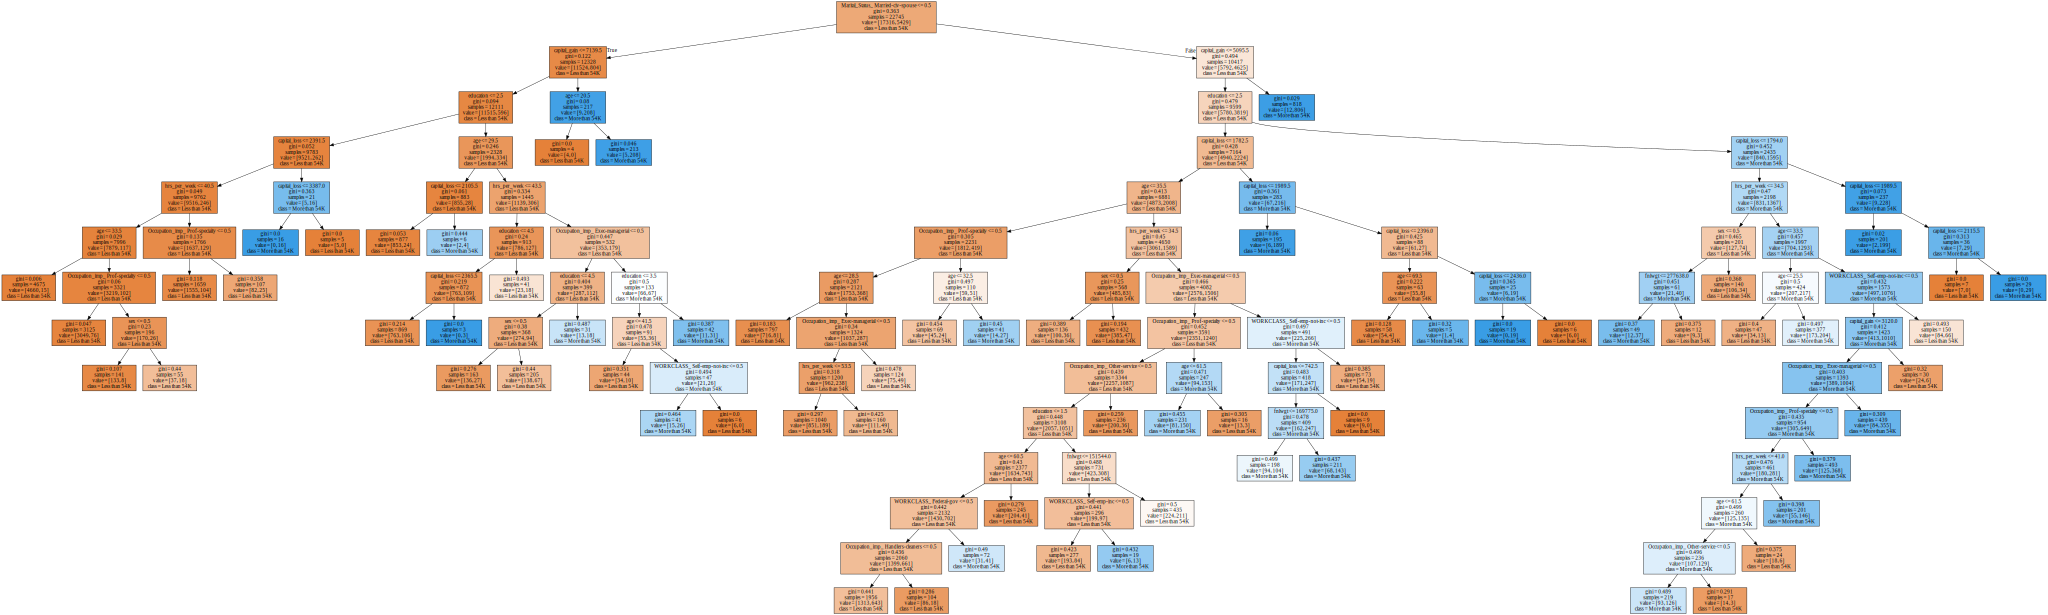

In [317]:
#Pruning tree for best alpha value 
#choosing alpha value at 0.0.000182
model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.000182 )
model.fit(scaled_train.iloc[:,:34], scaled_train.iloc[:,34])
pred1 = model.predict (scaled_test.iloc[:,:34])
print('Accuracy: ', accuracy_score(scaled_test.iloc[:,34], pred1))
Accuracy_dt_pruned={"Pruned Decision Trees":accuracy_score(scaled_test.iloc[:,34], pred1)}
dot_data = tree.export_graphviz(model, out_file=None, feature_names=scaled_train.iloc[:,:34].columns, class_names=["Less than 54K","More than 54K"],filled=True) 
graph = graphviz.Source(dot_data) 
graph

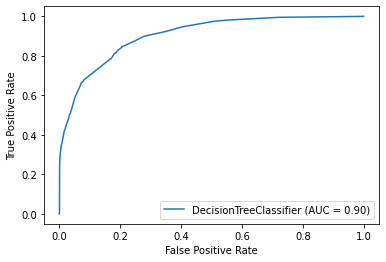

In [318]:
plot_roc_curve(model,scaled_test.iloc[:,:34], scaled_test.iloc[:,34])
plt.show()


In [319]:

Accuracy_dt_Pruned={"Name" : "Pruned Decision Trees", "Accuracy":accuracy_score(scaled_test.iloc[:,34], pred1),"Sensitivity":metrics.recall_score(scaled_test.iloc[:,34], pred1),"Specificity": cm1[0,0]/(cm1[0,0]+cm1[0,1]),"F1_score":metrics.f1_score(scaled_test.iloc[:,34], pred1),"AUC_score":metrics.roc_auc_score(scaled_test.iloc[:,34], pred1)}


# **Random Forest**

In [320]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(max_depth=19, n_estimators=50, random_state=2).fit(scaled_train.iloc[:,:34], scaled_train.iloc[:,34])
pred = model_RF.predict(scaled_test.iloc[:,:34])
#print('F1 Score: ', f1_score(scaled_test.iloc[:,:34], pred))
#fpr, tpr, _ = roc_curve(scaled_test.iloc[:,:34], pred)
#roc_auc = auc(y_test, pred)
print('Accuracy: ', accuracy_score(scaled_test.iloc[:,34], pred))


Accuracy:  0.8631825590872045


In [321]:
cm1 = confusion_matrix(scaled_test.iloc[:,34], pred)

Accuracy_RF={"Name" : "Random Forest", "Accuracy":accuracy_score(scaled_test.iloc[:,34], pred),"Sensitivity":metrics.recall_score(scaled_test.iloc[:,34], pred),"Specificity": cm1[0,0]/(cm1[0,0]+cm1[0,1]),"F1_score":metrics.f1_score(scaled_test.iloc[:,34], pred),"AUC_score":metrics.roc_auc_score(scaled_test.iloc[:,34], pred)}


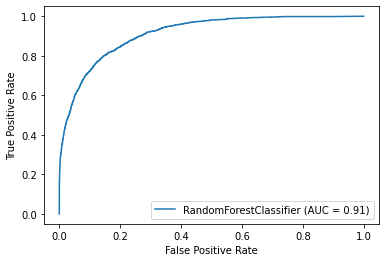

In [322]:
plot_roc_curve(model_RF,scaled_test.iloc[:,:34], scaled_test.iloc[:,34])
plt.show()

# **Logistic Regression**

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [324]:
train1=train.copy()
test1=test.copy()
income = train1['income']
train1 = train1.drop(columns=['income'])
train1.insert(loc=14, column='income', value=income)

income = test1['income']
test1 = test1.drop(columns=['income'])
test1.insert(loc=14, column='income', value=income)

In [325]:
train1.income.replace(to_replace=' >50K', value= 1, inplace=True)           # Interest Class is having Income greater than 50K $ per year
train1.income.replace(to_replace=' <=50K', value= 0, inplace=True)         # Encoding Income column

test1.income.replace(to_replace=' >50K', value= 1, inplace=True)
test1.income.replace(to_replace=' <=50K', value= 0, inplace=True)

In [326]:
train1 = train1.drop(['Type'], axis=1)
test1 = test1.drop(['Type'], axis =1)

In [327]:
df_train_logistic = train1
df_test_logistic = test1

In [328]:
from sklearn.preprocessing import OrdinalEncoder

list = ['workclass_imputed','education','marital_status', 'occupation_imputed', 'relationship', 'race','sex', 'country']

for i in list:                                                                  # Encoding categorical predictors
  ord_enc = OrdinalEncoder()
  df_train_logistic[i] = ord_enc.fit_transform(df_train_logistic[[i]])

for i in list:
  ord_enc = OrdinalEncoder()
  df_test_logistic[i] = ord_enc.fit_transform(df_test_logistic[[i]])

In [329]:
df_train_logistic

age  fnlwgt  education  ...  occupation_imputed  workclass_imputed  income
0       39   77516        9.0  ...                 0.0                6.0       0
1       50   83311        9.0  ...                 3.0                5.0       0
2       38  215646       11.0  ...                 5.0                3.0       0
3       53  234721        1.0  ...                 5.0                3.0       0
4       28  338409        9.0  ...                 9.0                3.0       0
...    ...     ...        ...  ...                 ...                ...     ...
22740   25  240081       11.0  ...                11.0                3.0       0
22741   22  147655       15.0  ...                 0.0                3.0       0
22742   26   90277       11.0  ...                 0.0                3.0       0
22743   49   60751       11.0  ...                10.0                3.0       0
22744   44  194636       11.0  ...                 2.0                5.0       0

[22745 rows x 14 columns]

In [330]:
X_train = df_train_logistic.iloc[:,0:13]
y_train = df_train_logistic.iloc[:,13]

X_test = df_test_logistic.iloc[:,0:13]
y_test = df_test_logistic.iloc[:,13]

In [331]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(max_iter=1000, 
                           solver= 'newton-cg').fit(X_train, y_train)           # With 'newton-cg'solver, we are getting highest accuracy among all other parameters. 
pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

Accuracy:  0.8026691116544418
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7404
           1       0.72      0.33      0.45      2412

    accuracy                           0.80      9816
   macro avg       0.77      0.64      0.66      9816
weighted avg       0.79      0.80      0.77      9816

Model Coefficient:  [[ 3.13189929e-02  3.43756005e-07  5.40075102e-02 -2.00164448e-01
  -1.55101596e-01  1.31848720e-01  7.01429669e-01  3.14156484e-04
   7.41968926e-04  3.30634757e-02  4.15788929e-04  2.29724865e-02
  -8.87867236e-02]]

ROC Curve: 


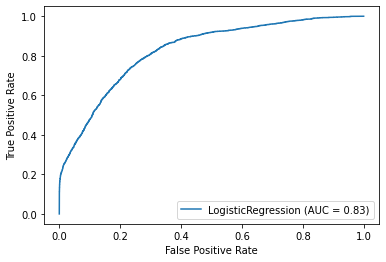

In [332]:

print('Accuracy: ', accuracy_score(y_test, pred))
print("Classification Report: ")
print(classification_report(y_test, pred))
print('Model Coefficient: ', model.coef_)
print('')
print("ROC Curve: ")
plot_roc_curve(model,X_test,y_test)
plt.show()


In [333]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
pipe_kNN = Pipeline (steps = [ ('model',LogisticRegression( max_iter=1000, solver= 'newton-cg'))])
pipe_kNN_scaled = Pipeline (steps = [('Scaler', StandardScaler()), ('model', LogisticRegression(max_iter=1000, solver= 'newton-cg'))])
pipe_kNN_scaled_pca = Pipeline (steps = [('Scaler', StandardScaler()), ('pca',PCA(n_components=8)), ('model',LogisticRegression( max_iter=1000, solver= 'newton-cg'))])

pipe_list = [pipe_kNN, pipe_kNN_scaled, pipe_kNN_scaled_pca]

for pipe in pipe_list:
  model = pipe.fit(X_train, y_train) 
  pred = model.predict(X_test)
  cm1 = confusion_matrix(y_test, pred)
  specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print(' Accuracy', accuracy_score(y_test, pred),"\n" , "sensitivity", metrics.recall_score(y_test, pred) , "\n","Auc_score", metrics.roc_auc_score(y_test, pred), "\n","F1_score", metrics.f1_score(y_test, pred), "\n", 'Specificity', specificity1)





/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

 Accuracy 0.8026691116544418 
 sensitivity 0.3250414593698176 
 Auc_score 0.6416536308194307 
 F1_score 0.44736091298145514 
 Specificity 0.9582658022690438
 Accuracy 0.8027709861450693 
 sensitivity 0.3250414593698176 
 Auc_score 0.6417211618837203 
 F1_score 0.4474885844748859 
 Specificity 0.958400864397623
 Accuracy 0.7903422982885085 
 sensitivity 0.2980928689883914 
 Auc_score 0.6243975960285015 
 F1_score 0.41132723112128144 
 Specificity 0.9507023230686116


In [342]:
Accuracy_Logistic={"Name":"Unscaled_Logistic" ,"Accuracy":0.802669,"Sensitivity":"0.32504 ","Specificity":"0.95826","F1_score":"0.447360 ","AUC_score":"0.64165 "}
Accuracy_Logistic_scaled={"Name":"Scaled_Logistic" ,"Accuracy":0.80277,"Sensitivity":"0.32504 ","Specificity":"0.95840","F1_score":"0.447488 ","AUC_score":"0.64172 "}
Accuracy_Logistic_PCA={"Name":"Scaled_PCA_Logsitic" ,"Accuracy":0.79034 ,"Sensitivity":"0.298092","Specificity":"0.9507023","F1_score":"0.41132 ","AUC_score": "0.624397"}

# **Neural Networks**

In [ ]:
X_train = df_train_logistic.iloc[:,0:13]
y_train = df_train_logistic.iloc[:,13]

X_test = df_test_logistic.iloc[:,0:13]
y_test = df_test_logistic.iloc[:,13]

In [ ]:
model = MLPClassifier(max_iter=500, learning_rate_init= 0.03)
model.fit(X_train, y_train)
pred = model.predict(X_test)

Accuracy:  0.7972697636511817

Classification Report: 
              precision    recall  f1-score   support

       False       0.81      0.96      0.88      7404
        True       0.70      0.31      0.43      2412

    accuracy                           0.80      9816
   macro avg       0.75      0.63      0.65      9816
weighted avg       0.78      0.80      0.77      9816


ROC Curve: 


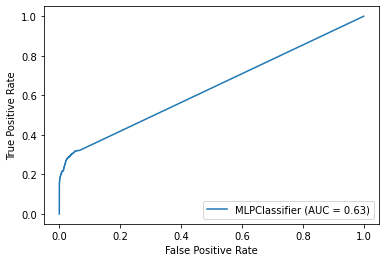

In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred))
print("")
print("Classification Report: ")
print(classification_report(y_test, pred))

print('')
print("ROC Curve: ")
plot_roc_curve(model,X_test,y_test)
plt.show()

In [ ]:
# With different transfer functions and learning rates

result = pd.DataFrame(columns=['Learning Rate', 'Transfer Function',  'Accuracy'])
lr = [0.0001, 0.001, 0.01, 0.03, 1, 3, 6]
transfer_function = ['identity', 'logistic', 'tanh', 'relu']
k=0
for i in lr:
  for j in transfer_function:
    model = MLPClassifier(learning_rate_init= i, activation=j)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    result.loc[k] = [i, j,  accuracy_score(y_test, pred)]
    k+=1
print(tabulate(result, headers=result.columns, tablefmt='grid'))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


+----+-----------------+---------------------+------------+
|    |   Learning Rate | Transfer Function   |   Accuracy |
+====+=================+=====================+============+
|  0 |          0.0001 | identity            |   0.741035 |
+----+-----------------+---------------------+------------+
|  1 |          0.0001 | logistic            |   0.764874 |
+----+-----------------+---------------------+------------+
|  2 |          0.0001 | tanh                |   0.791463 |
+----+-----------------+---------------------+------------+
|  3 |          0.0001 | relu                |   0.305929 |
+----+-----------------+---------------------+------------+
|  4 |          0.001  | identity            |   0.455685 |
+----+-----------------+---------------------+------------+
|  5 |          0.001  | logistic            |   0.760901 |
+----+-----------------+---------------------+------------+
|  6 |          0.001  | tanh                |   0.760289 |
+----+-----------------+----------------

**We got "0.8073" accuracy while implementing different transfer functions and learning rates.**

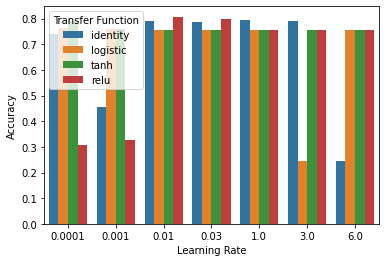

In [ ]:
sns.barplot(x='Learning Rate', y='Accuracy', hue='Transfer Function', data=result)

In [ ]:
X_train = df_train_logistic.iloc[:,0:13]
y_train = df_train_logistic.iloc[:,13]

X_test = df_test_logistic.iloc[:,0:13]
y_test = df_test_logistic.iloc[:,13]

In [ ]:
from sklearn.model_selection import GridSearchCV
model = MLPClassifier()
parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'), 'learning_rate_init':[ 0.0001, 0.001, 0.003]}
optimized_model = GridSearchCV(model, parameters, cv=5)
scaler = StandardScaler()
optimized_model.fit(scaler.fit_transform(X_train), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
optimized_model.best_score_

0.8433501868542537

### **After implementing different transfer functions and learning rates with gridsearch cross validation method in Neural networks, we got accuracy of "0.8433" .**

In [344]:
Accuracy_NN={"Name":"Neural Network","Accuracy":0.7972,"Sensitivity":"-","Specificity": "-","F1_score":"-","AUC_score":"-"}
Accuracy_NN_grid={"Name":"Neural Network (X-Validation)","Accuracy":0.7972,"Sensitivity":"-","Specificity": "-","F1_score":"-","AUC_score":"-"}

# **Accuracy Metrics**

In [345]:
Acc=pd.DataFrame([Accuracy_NB.values(),Accuracy_dt.values(),Accuracy_dt_HP.values(),Accuracy_dt_Pruned.values(),Accuracy_RF.values(),Accuracy_KNN.values(),Accuracy_KNN_scaled.values(),Accuracy_KNN_PCA.values(),Accuracy_Logistic.values(),Accuracy_Logistic_scaled.values(),Accuracy_Logistic_PCA.values(),Accuracy_NN.values(),Accuracy_NN_grid.values()],columns=Accuracy_KNN.keys())
#Acc=Acc.set_index(Acc.iloc[:,0]).drop(columns=["Name"],axis=1)

In [336]:
Acc

Name  Accuracy  ...    F1_score AUC_score
0                              Naive Bayes  0.783007  ...    0.485259  0.659369
1                           Decision Trees  0.808272  ...    0.608406  0.740129
2   Decision Trees (Hyperparameter tuning)  0.857783  ...    0.674136  0.770433
3                    Pruned Decision Trees  0.860839  ...    0.680094  0.773577
4                            Random Forest  0.863183  ...    0.683777  0.775131
5                             Unscaled_KNN   0.79513  ...    0.34000   0.59947 
6                               Scaled_KNN   0.83231  ...     0.5959   0.721404
7                           Scaled_PCA_KNN   0.8346   ...  0.6011758   0.724436
8                        Unscaled_Logistic  0.802669  ...   0.447360   0.64165 
9                          Scaled_Logistic   0.80277  ...   0.447488   0.64172 
10                     Scaled_PCA_Logsitic  0.79034   ...    0.41132   0.624397
11                          Neural Network    0.7972  ...           -         -
12           Neural Network (X-Validation)    0.7972  ...           -         -

[13 rows x 6 columns]

In [348]:
Acc.sort_values("Accuracy",ascending=False)


Name  Accuracy  ...    F1_score AUC_score
4                            Random Forest  0.863183  ...    0.683777  0.775131
3                    Pruned Decision Trees  0.860839  ...    0.680094  0.773577
2   Decision Trees (Hyperparameter tuning)  0.857783  ...    0.674136  0.770433
7                           Scaled_PCA_KNN  0.834600  ...  0.6011758   0.724436
6                               Scaled_KNN  0.832310  ...     0.5959   0.721404
1                           Decision Trees  0.808272  ...    0.608406  0.740129
9                          Scaled_Logistic  0.802770  ...   0.447488   0.64172 
8                        Unscaled_Logistic  0.802669  ...   0.447360   0.64165 
11                          Neural Network  0.797200  ...           -         -
12           Neural Network (X-Validation)  0.797200  ...           -         -
5                             Unscaled_KNN  0.795130  ...    0.34000   0.59947 
10                     Scaled_PCA_Logsitic  0.790340  ...    0.41132   0.624397
0                              Naive Bayes  0.783007  ...    0.485259  0.659369

[13 rows x 6 columns]

# **Hence , it can be seen that "RANDOM FOREST" and "PRUNED DECISION TREES" give the best accuracy with a good F1_SCORE and AUC as well**